# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [57]:
# imports
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# drive.mount('/gdrive')

In [3]:
# ruta = "/gdrive/MyDrive/EDEM/EDEM 2024/Machine Learning - Regresion/EJERCICIOS/insurance.csv"
# data = pd.read_csv(ruta)
data = pd.read_csv('insurance.csv')

In [4]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploramos el dataset

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


sex: ['female' 'male']
smoker: ['yes' 'no']
region: ['southwest' 'southeast' 'northwest' 'northeast']
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<Axes: >

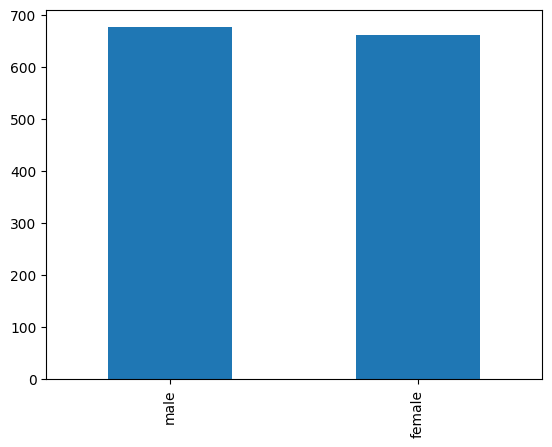

In [20]:
# Mostramos
print(f'sex:', data['sex'].unique())
print(f'smoker:',data['smoker'].unique())
print(f'region:',data['region'].unique())

# Count of each unique value in a categorical column
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

# Basic visualization of category counts
data['sex'].value_counts().plot(kind='bar')

<Axes: >

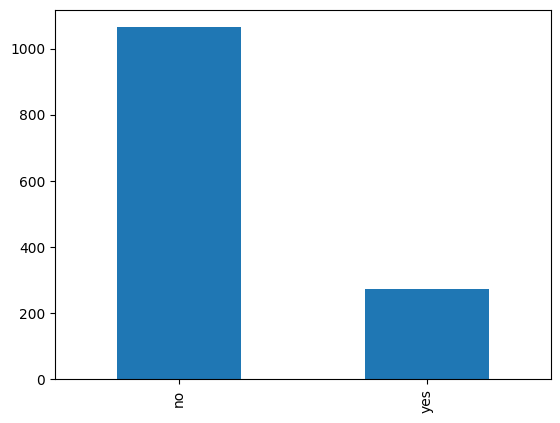

In [22]:
data['smoker'].value_counts().plot(kind='bar')

<Axes: >

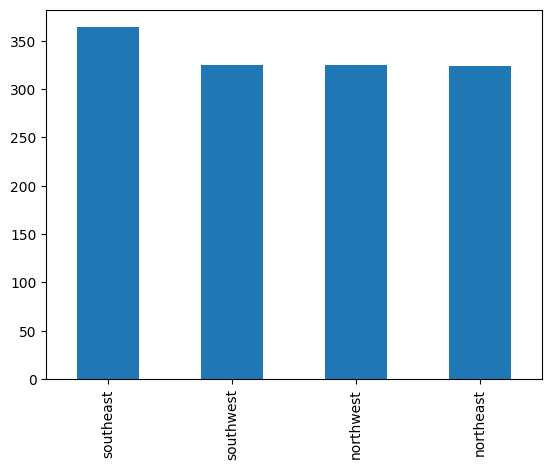

In [19]:
data['region'].value_counts().plot(kind='bar')

<Axes: >

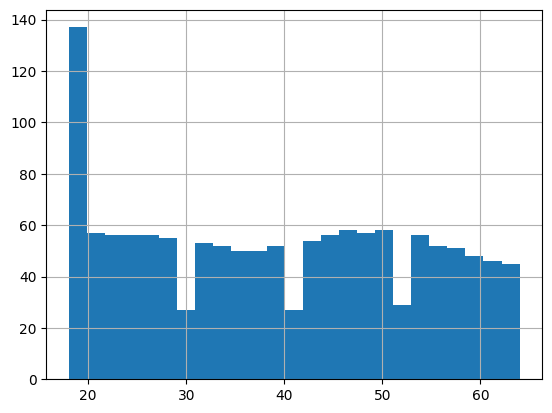

In [27]:
# Histogramas de variables categóricas
data['age'].hist(bins=25)

<Axes: >

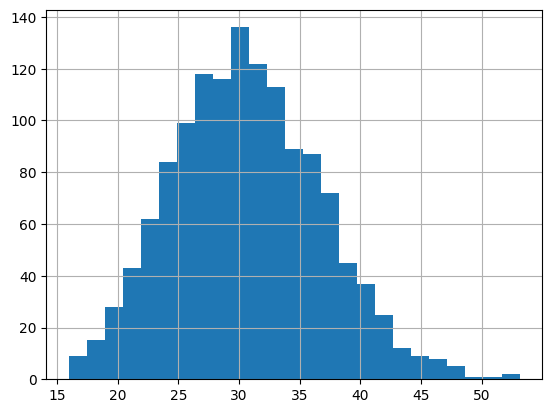

In [28]:
data['bmi'].hist(bins=25)

<Axes: >

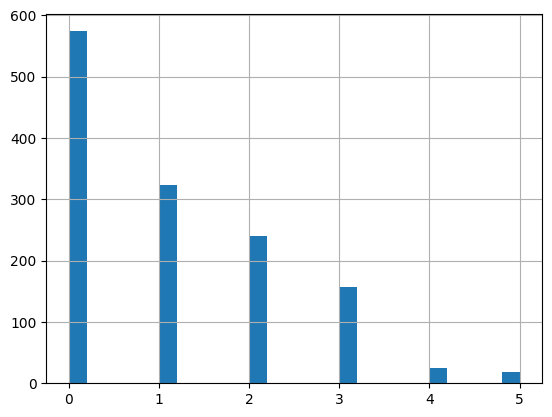

In [29]:
data['children'].hist(bins=25)

In [ ]:
data['charges'].hist(bins=50)

<Axes: >

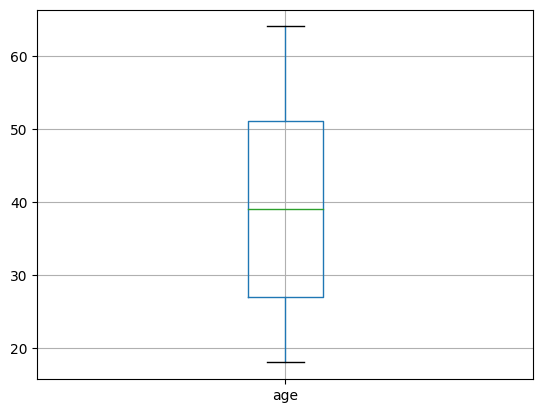

In [33]:
# Boxplot para variables numéricas
data.boxplot(column='age')

<Axes: >

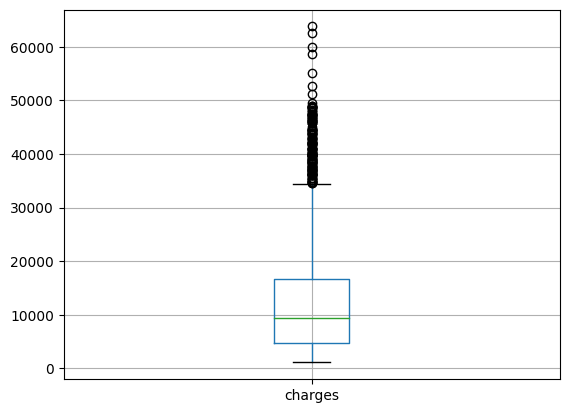

In [44]:
data.boxplot(column='charges')

<ipython-input-43-b783bd64142c>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


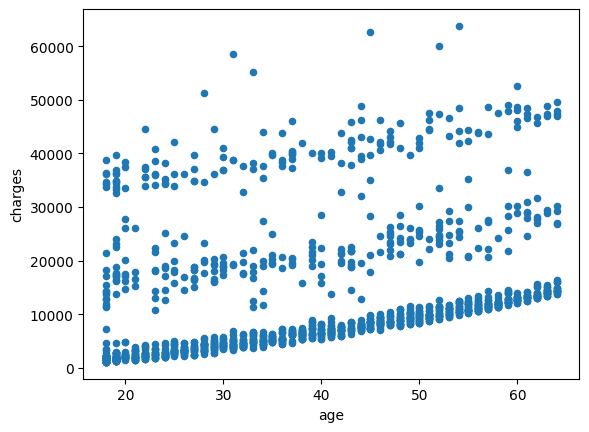

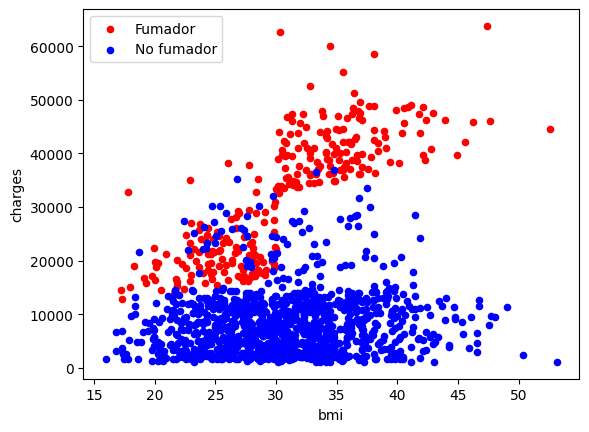

In [43]:
# Scatterplot age vs charges
data.plot(kind='scatter', x='age', y='charges')

# Scatterplot bmi vs charges
data[data['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', label='Fumador')
data[data['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='blue', label='No fumador', ax=plt.gca())

# Correlación de pares de variables
print(data.corr())

En esta primera exploración, parece que el dataset está limpio y completo (no hay entradas con datos vacíos, niveles repetidos en variables categóricas ni variables numéricas con valores sin sentido).

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

*Regresión lineal*

Primero, vamos a codificar las variables categóricas en numéricas con one-shot encoding

In [48]:
data_processed_lr = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
data_processed_lr.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [52]:
# Definimos las características y el target ('charges')
X = data_processed_lr.drop('charges', axis=1)
y = data_processed_lr['charges']

In [53]:
# Separamos los datos en set de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Inicializamos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Hacemos una predicción en el set de test
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 33780509.57479164
R^2 Score: 0.7696118054369011


In [58]:
# Ahora, probamos a escalar y normalizar, para comparar el modelo
# Inicializamos el scaler
scaler = StandardScaler()

# Transformamos los set de entrenamiento y test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-entrenamos y evaluamos el modelo
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluaamos el modelo con datos escalados
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Scaled Mean Squared Error: {mse_scaled}')
print(f'Scaled R^2 Score: {r2_scaled}')


Scaled Mean Squared Error: 33780509.574791655
Scaled R^2 Score: 0.769611805436901


In [ ]:
# Como vemos, la capacidad de predicción del modelo no mejora escalando y normalizando los datos.

# Conclusiones

In [ ]:
## A completar